# View Raw Output Images
This notebook lets you open and visualize the contents of the `outputs` folder as grayscale images.

In [22]:
import os
from matplotlib import pyplot as plt
import numpy as np

# Path to outputs folder
outputs_dir = '../../data/outputs'
data_dir = '../../data/raw'

# List all files in outputs folder
output_files = [f for f in os.listdir(outputs_dir) if os.path.isfile(os.path.join(outputs_dir, f))]
print('Available output files:')
for f in output_files:
    print(f)

Available output files:
output_hw_lena_512_512_csv.txt
output_software_lena_512_512_raw


In [23]:
# Function to load and display a raw image
def show_raw_image(dir, filename, width, height):
    path = os.path.join(dir, filename)
    with open(path, 'rb') as f:
        data = np.frombuffer(f.read(), dtype=np.uint8)
    if data.size != width * height:
        print(f'Error: Expected {width*height} bytes, got {data.size}')
        return
    img = data.reshape((height, width))
    plt.imshow(img, cmap='gray')
    plt.title(filename)
    plt.axis('off')
    plt.show()


In [24]:
def show_txt_image(dir, txt_filename, width, height):
    path = os.path.join(dir, txt_filename)
    try:
        data = np.loadtxt(path, dtype=np.uint8)
        if data.size != width * height:
            print(f'Error: Expected {width*height} pixels, got {data.size}')
            return
        img = data.reshape((height, width))
        plt.imshow(img, cmap='gray')
        plt.title(txt_filename)
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f'Error loading image: {e}')

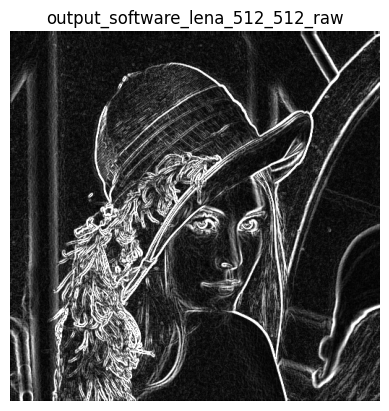

Error: Expected 262144 pixels, got 252200


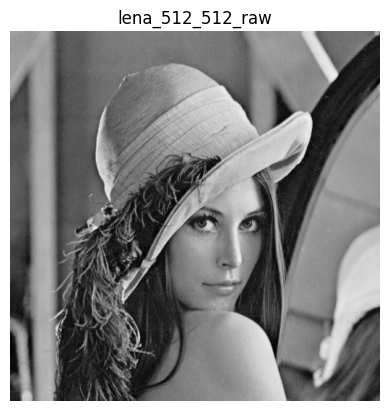

In [25]:
show_raw_image(outputs_dir,'output_software_lena_512_512_raw', 512, 512)
show_txt_image(outputs_dir, 'output_hw_lena_512_512_csv.txt', 512, 512)
show_raw_image(data_dir, 'lena_512_512_raw', 512, 512)